Triangulation
*Données*
- Motif mire 20mm

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image
import numpy as np
import cv2 as cv
from copy import deepcopy

from scipy.linalg import svd
import scipy

In [2]:
# Reading image

fname1 = "data/view1.jpg"
fname2 = "data/view2.jpg"

img1 = cv.cvtColor(cv.imread(fname1), cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(cv.imread(fname2), cv.COLOR_BGR2GRAY)

IMG_HEIGHT,IMG_WIDTH = img1.shape

In [5]:
# Trouver les points sur le damier gauche

img1_sub = deepcopy(img1)
img1_sub[:,IMG_WIDTH//2:] = 0

img2_sub = deepcopy(img2)
img2_sub[:,IMG_WIDTH//2:] = 0

ret,corners1 = cv.findChessboardCorners(img1_sub, (9,7))
corners1 = corners1.reshape((7*9,2))

ret,corners2 = cv.findChessboardCorners(img2_sub, (9,7))
corners2 = corners2.reshape((7*9,2))

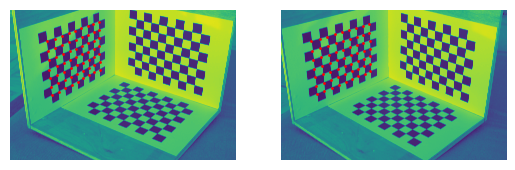

In [11]:
# Plot des points 

fig,(ax1,ax2) = plt.subplots(1,2)

ax1.imshow(img1)
ax1.scatter(corners1[:,0],corners1[:,1],s=1,c="r")
ax2.imshow(img2)
ax2.scatter(corners2[:,0],corners2[:,1],s=1,c="r")

ax1.set_axis_off()
ax2.set_axis_off()

In [15]:
# Associer un repère aux points du plan
corners_real = np.zeros((9*7,3))
dx = 20.
for i in range(9):
    for j in range(7):
        corners_real[i*7+j,0] = i*dx        
        corners_real[i*7+j,1] = j*dx

In [17]:
# Construction matrice A
nbPts = 9*7
A = np.zeros((nbPts*3,9))

for n in range(nbPts):
    
    x1,x2 = corners1[n,:]
    x3 = 1    
    X1,X2,X3 = corners_real[n,:]
    
    A_ = np.array([
        [0, 0, 0, -x3*X1, -x3*X2, -x3*X3, x2*X1, x2*X2, x2*X3],
        [x3*X1, x3*X2, x3*X3, 0, 0, 0, -x1*X1, -x1*X2, -x1*X3],
        [-x2*X1, -x2*X2, -x2*X3, x1*X1, x1*X2, x1*X3, 0, 0, 0]
    ])
    
    A[3*n:3*n+3,:] = A_

ValueError: not enough values to unpack (expected 3, got 2)